In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Convert categorical columns to numeric using get_dummies
df = pd.get_dummies(df, drop_first=True)

# Preview
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [2]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [3]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [5]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [6]:
from sklearn.linear_model import LinearRegression

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [7]:
y_pred

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.32722559, 3294646.25725955, 3532275.09556558,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323635,
       5244847.52716801, 7555324.21605603, 3220790.84680268,
       5191898.79934206, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R² Score: 0.65


In [13]:
# Coefficients table
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


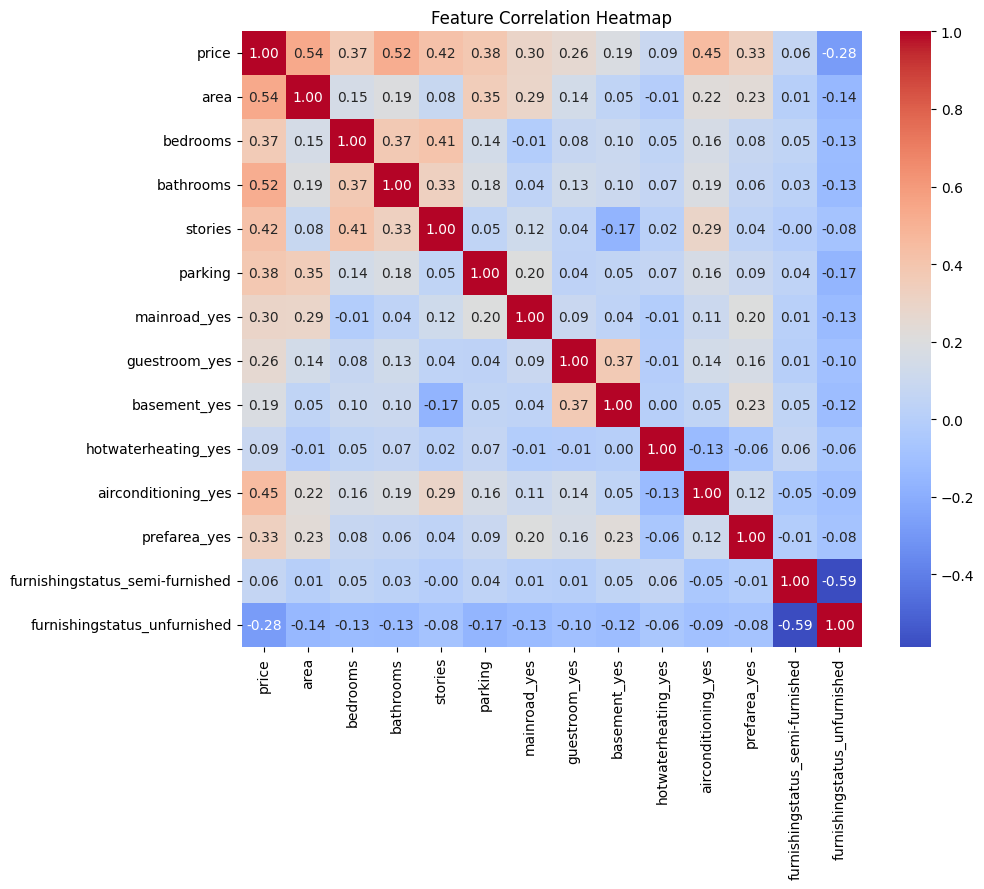

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


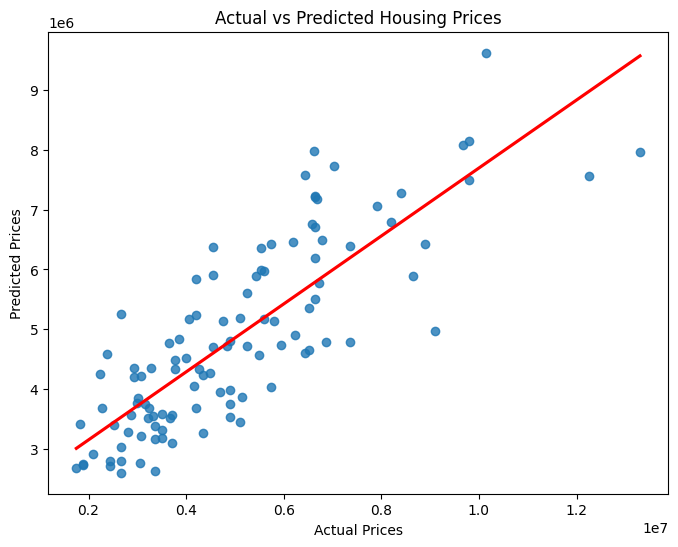

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model.predict(X_test)

# Scatter plot + regression line
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color":"red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
